Dataset loaded successfully!


,Date of Sale,Address,Postal Code,County,Price,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,25/03/22,"12A AUBURN VILLAS, RATHGAR, DUBLIN",Dublin 2,Dublin,390000.00,0,0,Second-Hand Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
1,25/03/22,"18 the turnstone, barnageeragh cove, skerries",Dublin 2,Dublin,317180.62,0,1,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
2,25/03/22,"180 TIMBER MILLS, KILMORE RD, ARTANE DUBLIN 5",Dublin 5,Dublin,300000.00,0,0,Second-Hand Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
3,25/03/22,"30 NORTHBROOK TCE, NORTH STRAND, DUBLIN 3",Dublin 2,Dublin,340000.00,0,0,Second-Hand Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
4,25/03/22,"41 Westmill Place, Millers Glen, Swords",Dublin 2,Dublin,325991.00,0,1,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...



===== REGRESSION METRICS =====
Mean Squared Error (MSE): 0.2443
R² Score: 0.0223

===== CLASSIFICATION METRICS =====
Confusion Matrix:
 [[ 1221 15789]
 [  225 16201]]
Accuracy: 0.5211
Precision: 0.5064
Recall: 0.9863
F1 Score: 0.6692
AUC: 0.5444


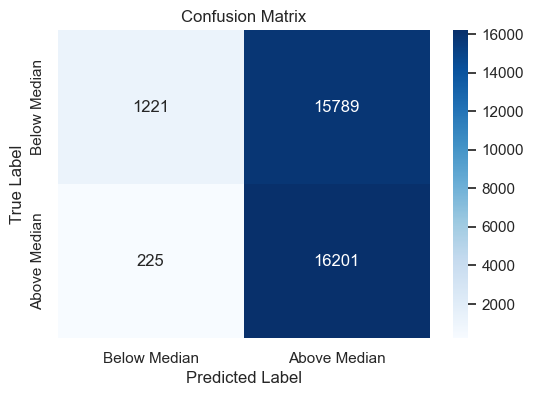

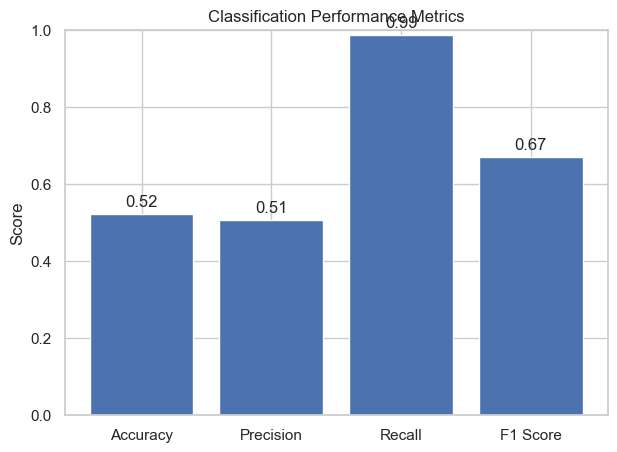

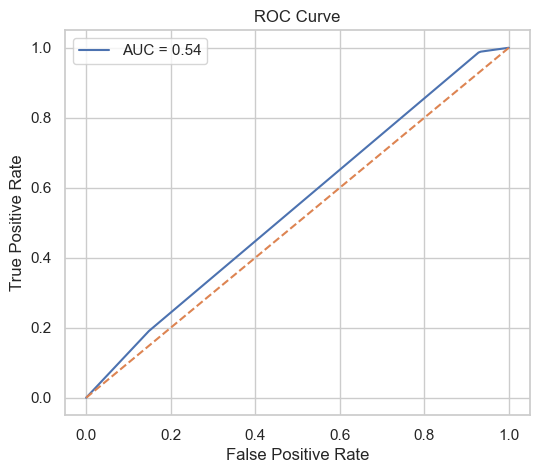

In [5]:
# =====================================================
# 1. IMPORT LIBRARIES
# =====================================================
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_squared_error, r2_score,
    confusion_matrix, accuracy_score,
    precision_score, recall_score, f1_score,
    roc_curve, auc
)

import matplotlib.pyplot as plt
import seaborn as sns

# Improve plot appearance
sns.set(style="whitegrid")


# =====================================================
# 2. LOAD DATASET (LOCAL JUPYTER)
# =====================================================
# Make sure the Excel file is in the SAME folder as this notebook
data = pd.read_excel("dublin_house_prices_cleaned.xlsx")

print("Dataset loaded successfully!")
display(data.head())


# =====================================================
# 3. CREATE BINARY TARGET FROM PRICE
# =====================================================
median_price = data['Price'].median()
data['above_median_price'] = (data['Price'] > median_price).astype(int)


# =====================================================
# 4. FEATURES & TARGET
# =====================================================
X = data.drop(['Price', 'above_median_price'], axis=1)
y = data['above_median_price']


# =====================================================
# 5. HANDLE DATETIME & NON-NUMERIC COLUMNS
# =====================================================
# Convert datetime columns to numeric
for col in X.columns:
    if np.issubdtype(X[col].dtype, np.datetime64):
        X[col] = X[col].map(pd.Timestamp.toordinal)

# Keep only numeric columns
X = X.select_dtypes(include=[np.number])

# Handle missing values
X = X.fillna(X.mean())


# =====================================================
# 6. TRAIN-TEST SPLIT
# =====================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# =====================================================
# 7. TRAIN LINEAR REGRESSION MODEL
# =====================================================
model = LinearRegression()
model.fit(X_train, y_train)


# =====================================================
# 8. PREDICTIONS
# =====================================================
# Continuous predictions
y_pred_continuous = model.predict(X_test)

# Binary predictions using threshold
y_pred_binary = (y_pred_continuous >= 0.5).astype(int)


# =====================================================
# 9. REGRESSION METRICS
# =====================================================
mse = mean_squared_error(y_test, y_pred_continuous)
r2 = r2_score(y_test, y_pred_continuous)


# =====================================================
# 10. CLASSIFICATION METRICS
# =====================================================
cm = confusion_matrix(y_test, y_pred_binary)
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)


# =====================================================
# 11. ROC & AUC
# =====================================================
fpr, tpr, thresholds = roc_curve(y_test, y_pred_continuous)
roc_auc = auc(fpr, tpr)


# =====================================================
# 12. PRINT RESULTS
# =====================================================
print("\n===== REGRESSION METRICS =====")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

print("\n===== CLASSIFICATION METRICS =====")
print("Confusion Matrix:\n", cm)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {roc_auc:.4f}")


# =====================================================
# 13. VISUALIZATIONS
# =====================================================

# --- Confusion Matrix ---
plt.figure(figsize=(6, 4))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=['Below Median', 'Above Median'],
    yticklabels=['Below Median', 'Above Median']
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


# --- Performance Metrics Bar Chart ---
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(7, 5))
plt.bar(metrics, values)
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("Classification Performance Metrics")

for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')

plt.show()


# --- ROC Curve ---
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
